In [1]:
import os
import re
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper")

In [2]:
pd.__version__

'1.0.3'

In [3]:
all_csvs = glob.glob("../output.shared_kmers/*shared-kmers.csv")
all_csvs

['../output.shared_kmers/gtdb-r95.nucleotide-k21-scaled2000.shared-kmers.csv',
 '../output.shared_kmers/gtdb-r95.dayhoff-k16-scaled200.shared-kmers.csv',
 '../output.shared_kmers/gtdb-r95.hp-k42-scaled200.shared-kmers.csv',
 '../output.shared_kmers/gtdb-r95.nucleotide-k51-scaled2000.shared-kmers.csv',
 '../output.shared_kmers/gtdb-r95.protein-k7-scaled200.shared-kmers.csv',
 '../output.shared_kmers/gtdb-r95.protein-k10-scaled200.shared-kmers.csv',
 '../output.shared_kmers/gtdb-r95.nucleotide-k31-scaled2000.shared-kmers.csv']

In [4]:
#acc2ftp_files = expand("inputs/mgnify_raw_reads_links/{accession}.tsv", accession=ACCESSIONS)
sharedDF = pd.concat([pd.read_csv(csv, sep=",").assign(fileinfo=os.path.basename(csv).rsplit(".shared-kmers.csv")[0]) for csv in all_csvs], ignore_index=True)

In [5]:
#lcaDF["alphabet"],lcaDF["ksize"], lcaDF["scaled"] =
sharedDF["alphabet"] = sharedDF["fileinfo"].str.extract(r"gtdb-r95.(?P<alphabet>\w*)-k")
sharedDF["ksize"] = sharedDF["fileinfo"].str.extract(r"-k(?P<ksize>\d*)")
sharedDF["scaled"] = sharedDF["fileinfo"].str.extract(r"-scaled(?P<scaled>\d*)")
sharedDF["alpha-ksize"] = sharedDF["alphabet"] + "-" + sharedDF["ksize"]

#lcaDF["alphabet"],lcaDF["ksize"], lcaDF["scaled"] = extactDF["alphabet"],extractDF["ksize"], extractDF["scaled"]

In [6]:
sharedDF["percent_shared_kmers"] = sharedDF["percent_shared_kmers"] + .00001

In [7]:
sharedDF

,rank,lineage,num_shared_kmers,percent_shared_kmers,fileinfo,alphabet,ksize,scaled,alpha-ksize
0,family,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,142084,0.02001,gtdb-r95.nucleotide-k21-scaled2000,nucleotide,21,2000,nucleotide-21
1,order,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,301184,0.05001,gtdb-r95.nucleotide-k21-scaled2000,nucleotide,21,2000,nucleotide-21
2,class,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,1239057,0.19001,gtdb-r95.nucleotide-k21-scaled2000,nucleotide,21,2000,nucleotide-21
3,phylum,d__Bacteria;p__Proteobacteria,2150736,0.32001,gtdb-r95.nucleotide-k21-scaled2000,nucleotide,21,2000,nucleotide-21
4,superkingdom,d__Bacteria,6464447,0.97001,gtdb-r95.nucleotide-k21-scaled2000,nucleotide,21,2000,nucleotide-21
...,...,...,...,...,...,...,...,...,...
44625,genus,d__Archaea;p__Thermoproteota;c__Bathyarchaeia;...,367,0.00001,gtdb-r95.nucleotide-k31-scaled2000,nucleotide,31,2000,nucleotide-31
44626,genus,d__Archaea;p__Halobacteriota;c__Methanosarcini...,78,0.00001,gtdb-r95.nucleotide-k31-scaled2000,nucleotide,31,2000,nucleotide-31
44627,family,d__Archaea;p__Halobacteriota;c__Methanosarcini...,78,0.00001,gtdb-r95.nucleotide-k31-scaled2000,nucleotide,31,2000,nucleotide-31
44628,order,d__Archaea;p__Halobacteriota;c__Methanosarcini...,78,0.00001,gtdb-r95.nucleotide-k31-scaled2000,nucleotide,31,2000,nucleotide-31


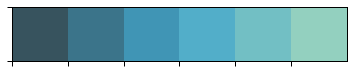

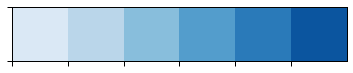

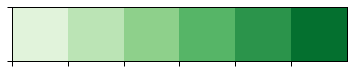

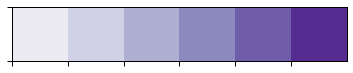

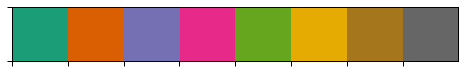

In [18]:
sns.palplot(sns.color_palette("GnBu_d"))
blues = sns.palplot(sns.color_palette("Blues"))
sns.palplot(sns.color_palette("Greens"))
sns.palplot(sns.color_palette("Purples"))
sns.palplot(sns.color_palette("Dark2"))

In [19]:
#dayhoff_rankinfo = dayhoff.groupby("rank", "alphabet")['num_lca_kmers'].agg('sum')
rankorder = ["genus", "family", "order", "class", "phylum", "superkingdom"]
alphabet_colors = {"nucleotide":"#b2182b", "protein": "#2166ac", "dayhoff": "#4393c3", "hp": "#92c5de"}
alphaksize_colors =  {"nucleotide-21":"#b2182b","nucleotide-31":"#d6604d","nucleotide-51":"#f4a582", "protein-7": "#4393c3", "protein-10": "#2166ac", "dayhoff-16": "#1b7837", "hp-42": "#5aae61"}
no_superk = sharedDF[sharedDF["rank"] != "superkingdom"]
no_superk_rankorder = ["genus", "family", "order", "class", "phylum"]
alphaksize_order = ["nucleotide-21", "nucleotide-31","nucleotide-51","protein-7", "protein-10", "dayhoff-16", "hp-42"]
nucl_order = ["nucleotide-21", "nucleotide-31", "nucleotide-51"]
prot_order = ["protein-7", "protein-10"]

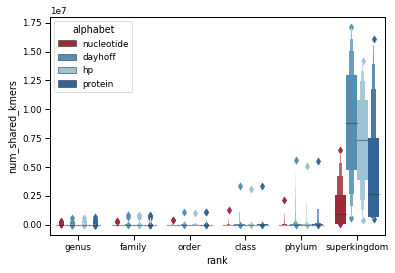

In [20]:
g=sns.boxenplot(data=sharedDF, x="rank", y="num_shared_kmers", hue="alphabet", palette=alphabet_colors, order=rankorder ) #palette="GnBu_d"
#g=sns.boxenplot(data=sharedDF, x="rank", y="num_shared_kmers", hue="alphabet", palette="GnBu_d", order=rankorder ) #palette="GnBu_d"

fig = g.get_figure()
fig.savefig("shared-kmers.pdf")

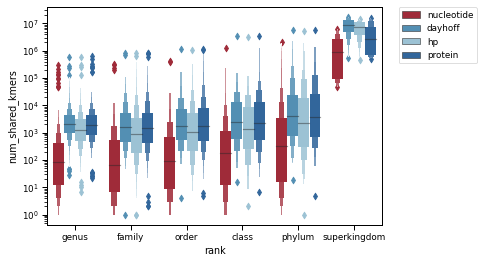

In [21]:
#g=sns.boxenplot(data=sharedDF, x="rank", y="num_shared_kmers", hue="alphabet", palette="GnBu_d", order=rankorder)
g=sns.boxenplot(data=sharedDF, x="rank", y="num_shared_kmers", hue="alphabet", palette=alphabet_colors, order=rankorder)

g.set(yscale="log")
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("shared-kmers-logscale.pdf")

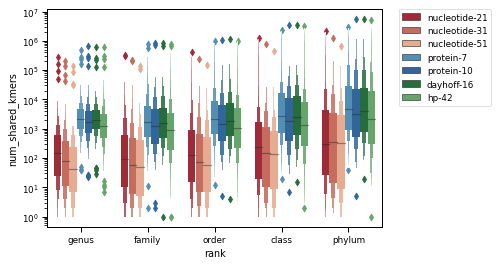

In [22]:
#g=sns.boxenplot(data=no_superk, x="rank", y="num_shared_kmers", hue="alpha-ksize", palette="RdBu", order=no_superk_rankorder, hue_order = alphaksize_order ) #palette="GnBu_d"
g=sns.boxenplot(data=no_superk, x="rank", y="num_shared_kmers", hue="alpha-ksize", palette=alphaksize_colors, order=no_superk_rankorder, hue_order = alphaksize_order ) #palette="GnBu_d"

g.set(yscale="log")
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


[None]

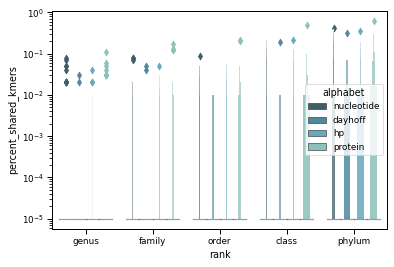

In [23]:
g=sns.boxenplot(data=no_superk, x="rank", y="percent_shared_kmers", hue="alphabet", palette="GnBu_d", order=no_superk_rankorder ) #palette="GnBu_d"
g.set(yscale="log")


## What about normalizing:: dividing by total number of k-mers under consideration at that step?
** ** recount and store a total 


"total number of k-mers under consideration at each stage?"
thoughts: how is this different from just TOTAL kmers? how does the rank matter?

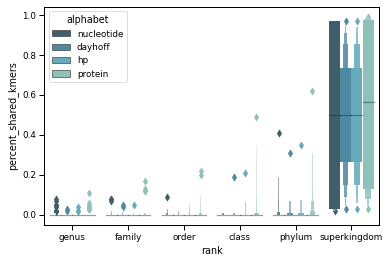

In [24]:
#g=sns.boxenplot(data=sharedDF, x="rank", y="num_shared_kmers", hue="alphabet", palette=alphabet_colors, order=rankorder ) #palette="GnBu_d"
g=sns.boxenplot(data=sharedDF, x="rank", y="percent_shared_kmers", hue="alphabet", palette="GnBu_d", order=rankorder ) #palette="GnBu_d"

fig = g.get_figure()
fig.savefig("shared-kmers.percent.pdf")

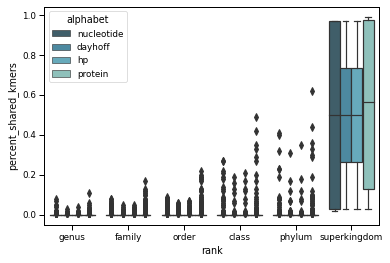

In [25]:
#g=sns.boxenplot(data=sharedDF, x="rank", y="num_shared_kmers", hue="alphabet", palette=alphabet_colors, order=rankorder ) #palette="GnBu_d"
g=sns.boxplot(data=sharedDF, x="rank", y="percent_shared_kmers", hue="alphabet", palette="GnBu_d", order=rankorder ) #palette="GnBu_d"

#fig = g.get_figure()
#fig.savefig("shared-kmers.percent.pdf")

In [26]:
no_superk = sharedDF[sharedDF["rank"] != "superkingdom"]
no_superk_rankorder = ["genus", "family", "order", "class", "phylum"]


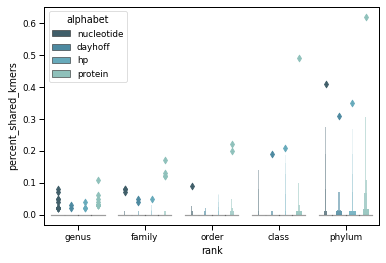

In [27]:
g=sns.boxenplot(data=no_superk, x="rank", y="percent_shared_kmers", hue="alphabet", palette="GnBu_d", order=no_superk_rankorder ) #palette="GnBu_d"

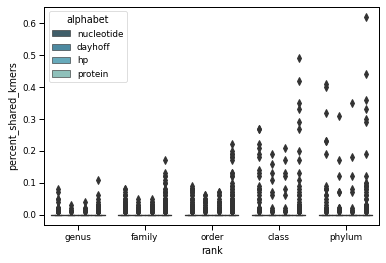

In [28]:
g=sns.boxplot(data=no_superk, x="rank", y="percent_shared_kmers", hue="alphabet", palette="GnBu_d", order=no_superk_rankorder ) #palette="GnBu_d"

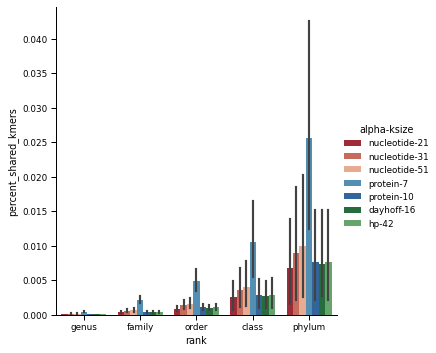

In [29]:
#g=sns.barplot(data=no_superk, x="rank", y="percent_shared_kmers", hue="alpha-ksize", palette="Blues")#, order=no_superk_rankorder ) #palette="GnBu_d"
g=sns.catplot(data=no_superk, x="rank", y="percent_shared_kmers", hue="alpha-ksize", palette=alphaksize_colors, order=no_superk_rankorder, hue_order=alphaksize_order, kind="bar") #palette="GnBu_d"

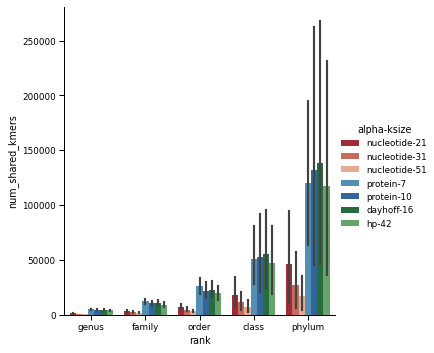

In [30]:
g=sns.catplot(data=no_superk, x="rank", y="num_shared_kmers", hue="alpha-ksize", palette=alphaksize_colors, order=no_superk_rankorder, hue_order=alphaksize_order, kind="bar") #palette="GnBu_d"

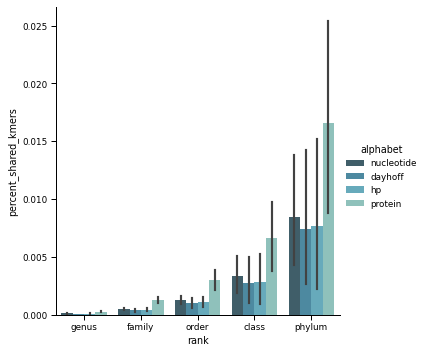

In [31]:
g=sns.catplot(data=no_superk, x="rank", y="percent_shared_kmers", hue="alphabet", palette="GnBu_d", order=no_superk_rankorder, kind="bar") #palette="GnBu_d"

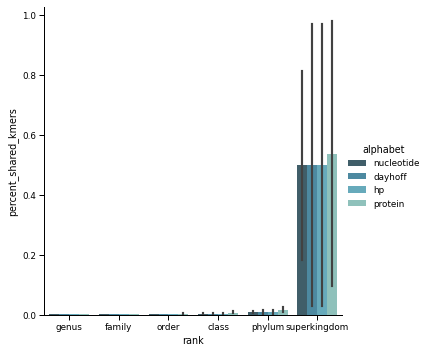

In [32]:
g=sns.catplot(data=sharedDF, x="rank", y="percent_shared_kmers", hue="alphabet", palette="GnBu_d", order=rankorder, kind="bar") #palette="GnBu_d"

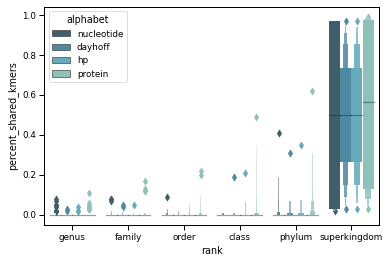

In [33]:
#g=sns.boxenplot(data=sharedDF, x="rank", y="num_shared_kmers", hue="alphabet", palette=alphabet_colors, order=rankorder ) #palette="GnBu_d"
g=sns.boxenplot(data=sharedDF, x="rank", y="percent_shared_kmers", hue="alphabet", palette="GnBu_d", order=rankorder ) #palette="GnBu_d"
#g.set(yscale="log")
fig = g.get_figure()
#fig.savefig("shared-kmers.percent-logscale.pdf")

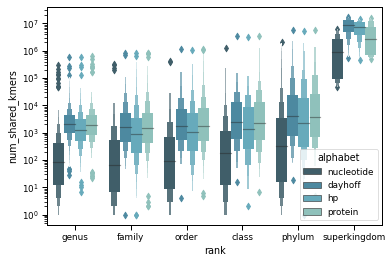

In [34]:
#g=sns.boxenplot(data=sharedDF, x="rank", y="num_shared_kmers", hue="alphabet", palette=alphabet_colors, order=rankorder ) #palette="GnBu_d"
g=sns.boxenplot(data=sharedDF, x="rank", y="num_shared_kmers", hue="alphabet", palette="GnBu_d", order=rankorder ) #palette="GnBu_d"
g.set(yscale="log")
fig = g.get_figure()
#fig.savefig("shared-kmers.percent-logscale.pdf")

In [35]:
sharedDF

,rank,lineage,num_shared_kmers,percent_shared_kmers,fileinfo,alphabet,ksize,scaled,alpha-ksize
0,family,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,142084,0.02001,gtdb-r95.nucleotide-k21-scaled2000,nucleotide,21,2000,nucleotide-21
1,order,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,301184,0.05001,gtdb-r95.nucleotide-k21-scaled2000,nucleotide,21,2000,nucleotide-21
2,class,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,1239057,0.19001,gtdb-r95.nucleotide-k21-scaled2000,nucleotide,21,2000,nucleotide-21
3,phylum,d__Bacteria;p__Proteobacteria,2150736,0.32001,gtdb-r95.nucleotide-k21-scaled2000,nucleotide,21,2000,nucleotide-21
4,superkingdom,d__Bacteria,6464447,0.97001,gtdb-r95.nucleotide-k21-scaled2000,nucleotide,21,2000,nucleotide-21
...,...,...,...,...,...,...,...,...,...
44625,genus,d__Archaea;p__Thermoproteota;c__Bathyarchaeia;...,367,0.00001,gtdb-r95.nucleotide-k31-scaled2000,nucleotide,31,2000,nucleotide-31
44626,genus,d__Archaea;p__Halobacteriota;c__Methanosarcini...,78,0.00001,gtdb-r95.nucleotide-k31-scaled2000,nucleotide,31,2000,nucleotide-31
44627,family,d__Archaea;p__Halobacteriota;c__Methanosarcini...,78,0.00001,gtdb-r95.nucleotide-k31-scaled2000,nucleotide,31,2000,nucleotide-31
44628,order,d__Archaea;p__Halobacteriota;c__Methanosarcini...,78,0.00001,gtdb-r95.nucleotide-k31-scaled2000,nucleotide,31,2000,nucleotide-31


In [36]:
alphabet_size = {
"nucleotide": 4,
"protein": 20,
"dayhoff": 6,
"hp": 2,
}

In [37]:
def calculate_potential_kmers(row):
    alpha_size = alphabet_size[row["alphabet"]]
    row["potential_kmers"] = int(alpha_size) ** int(row["ksize"])
    return row

In [38]:
sharedDF = sharedDF.apply(calculate_potential_kmers, axis=1)

In [39]:
sharedDF

,rank,lineage,num_shared_kmers,percent_shared_kmers,fileinfo,alphabet,ksize,scaled,alpha-ksize,potential_kmers
0,family,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,142084,0.02001,gtdb-r95.nucleotide-k21-scaled2000,nucleotide,21,2000,nucleotide-21,4398046511104
1,order,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,301184,0.05001,gtdb-r95.nucleotide-k21-scaled2000,nucleotide,21,2000,nucleotide-21,4398046511104
2,class,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,1239057,0.19001,gtdb-r95.nucleotide-k21-scaled2000,nucleotide,21,2000,nucleotide-21,4398046511104
3,phylum,d__Bacteria;p__Proteobacteria,2150736,0.32001,gtdb-r95.nucleotide-k21-scaled2000,nucleotide,21,2000,nucleotide-21,4398046511104
4,superkingdom,d__Bacteria,6464447,0.97001,gtdb-r95.nucleotide-k21-scaled2000,nucleotide,21,2000,nucleotide-21,4398046511104
...,...,...,...,...,...,...,...,...,...,...
44625,genus,d__Archaea;p__Thermoproteota;c__Bathyarchaeia;...,367,0.00001,gtdb-r95.nucleotide-k31-scaled2000,nucleotide,31,2000,nucleotide-31,4611686018427387904
44626,genus,d__Archaea;p__Halobacteriota;c__Methanosarcini...,78,0.00001,gtdb-r95.nucleotide-k31-scaled2000,nucleotide,31,2000,nucleotide-31,4611686018427387904
44627,family,d__Archaea;p__Halobacteriota;c__Methanosarcini...,78,0.00001,gtdb-r95.nucleotide-k31-scaled2000,nucleotide,31,2000,nucleotide-31,4611686018427387904
44628,order,d__Archaea;p__Halobacteriota;c__Methanosarcini...,78,0.00001,gtdb-r95.nucleotide-k31-scaled2000,nucleotide,31,2000,nucleotide-31,4611686018427387904


In [40]:
sharedDF["percent_of_potential"] = sharedDF["num_shared_kmers"] / sharedDF["potential_kmers"]

In [41]:
sharedDF[sharedDF["alphabet"]=="protein"]

,rank,lineage,num_shared_kmers,percent_shared_kmers,fileinfo,alphabet,ksize,scaled,alpha-ksize,potential_kmers,percent_of_potential
25215,genus,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,16473,0.00001,gtdb-r95.protein-k7-scaled200,protein,7,200,protein-7,1280000000,1.28695e-05
25216,genus,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,67147,0.01001,gtdb-r95.protein-k7-scaled200,protein,7,200,protein-7,1280000000,5.24586e-05
25217,genus,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,8687,0.00001,gtdb-r95.protein-k7-scaled200,protein,7,200,protein-7,1280000000,6.78672e-06
25218,genus,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,8114,0.00001,gtdb-r95.protein-k7-scaled200,protein,7,200,protein-7,1280000000,6.33906e-06
25219,genus,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,7040,0.00001,gtdb-r95.protein-k7-scaled200,protein,7,200,protein-7,1280000000,5.5e-06
...,...,...,...,...,...,...,...,...,...,...,...
38569,family,d__Archaea;p__Thermoproteota;c__Bathyarchaeia;...,14,0.00001,gtdb-r95.protein-k10-scaled200,protein,10,200,protein-10,10240000000000,1.36719e-12
38570,order,d__Archaea;p__Thermoproteota;c__Bathyarchaeia;...,14,0.00001,gtdb-r95.protein-k10-scaled200,protein,10,200,protein-10,10240000000000,1.36719e-12
38571,genus,d__Archaea;p__Hadarchaeota;c__Hadarchaeia;o__H...,224,0.00001,gtdb-r95.protein-k10-scaled200,protein,10,200,protein-10,10240000000000,2.1875e-11
38572,genus,d__Archaea;p__Nanoarchaeota;c__Nanoarchaeia;o_...,87,0.00001,gtdb-r95.protein-k10-scaled200,protein,10,200,protein-10,10240000000000,8.49609e-12


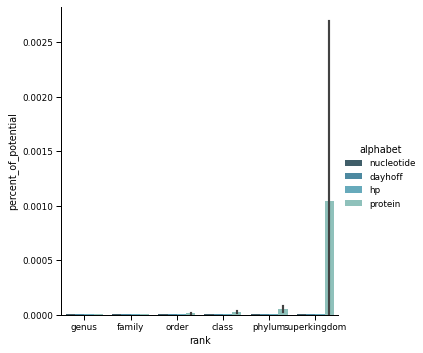

In [42]:
g=sns.catplot(data=sharedDF, x="rank", y="percent_of_potential", hue="alphabet", palette="GnBu_d", order=rankorder, kind="bar") #palette="GnBu_d"

In [43]:
no_superk = sharedDF[sharedDF["rank"] != "superkingdom"]
no_superk_rankorder = ["genus", "family", "order", "class", "phylum"]



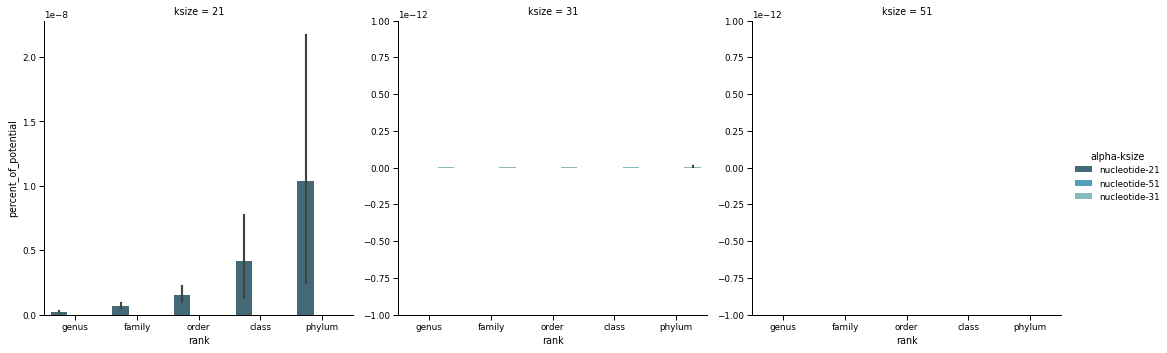

In [44]:
g=sns.catplot(data=no_superk[no_superk["alphabet"] == "nucleotide"], x="rank", y="percent_of_potential", hue="alpha-ksize", palette="GnBu_d",  col="ksize", order=no_superk_rankorder,sharey= False,kind="bar") #palette="GnBu_d"
#g.set_scale(log)

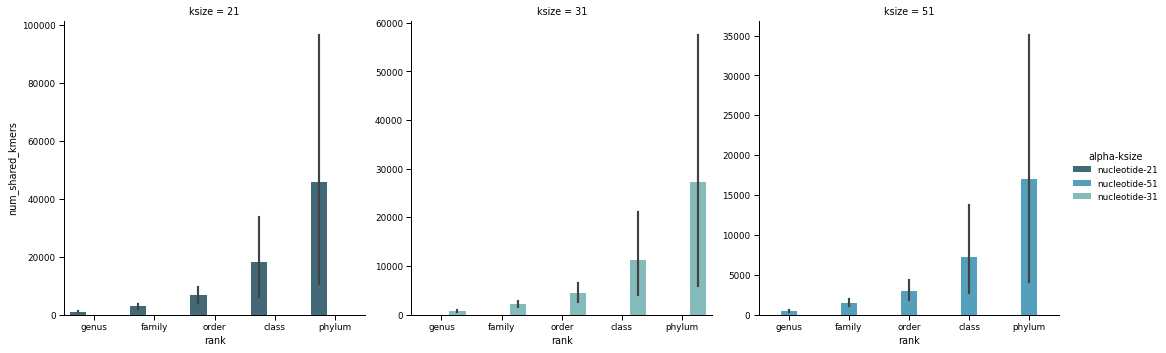

In [45]:
g=sns.catplot(data=no_superk[no_superk["alphabet"] == "nucleotide"], x="rank", y="num_shared_kmers", hue="alpha-ksize", palette="GnBu_d",  col="ksize", order=no_superk_rankorder,sharey= False,kind="bar") #palette="GnBu_d"


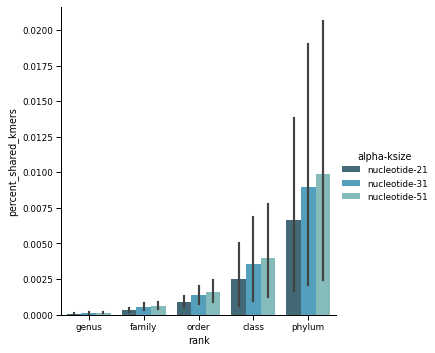

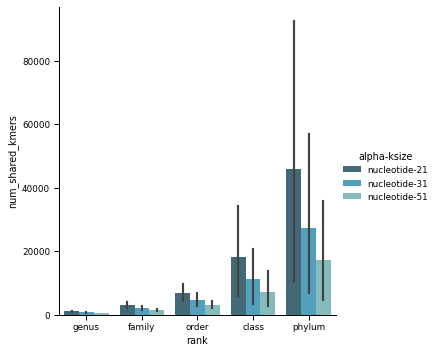

In [46]:
g=sns.catplot(data=no_superk[no_superk["alphabet"] == "nucleotide"], x="rank", y="percent_shared_kmers", hue="alpha-ksize", palette="GnBu_d", order=no_superk_rankorder, kind="bar", hue_order=nucl_order)#,sharey= False,kind="bar") #palette="GnBu_d"
g=sns.catplot(data=no_superk[no_superk["alphabet"] == "nucleotide"], x="rank", y="num_shared_kmers", hue="alpha-ksize", palette="GnBu_d", order=no_superk_rankorder, kind="bar", hue_order=nucl_order) #,sharey= False,kind="bar") #palette="GnBu_d"


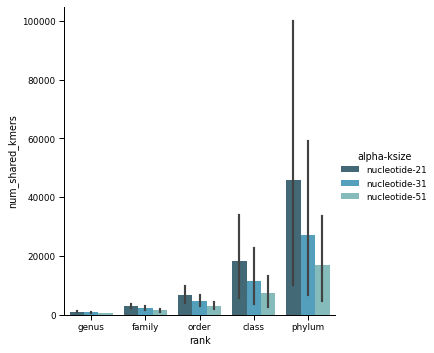

In [47]:
g=sns.catplot(data=no_superk[no_superk["alphabet"] == "nucleotide"], x="rank", y="num_shared_kmers", hue="alpha-ksize", palette="GnBu_d", order=no_superk_rankorder, kind="bar", hue_order=nucl_order) #sharey= False,kind="bar") #palette="GnBu_d"


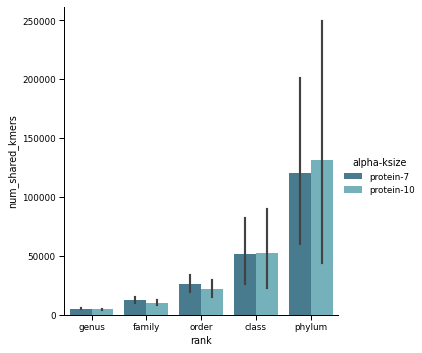

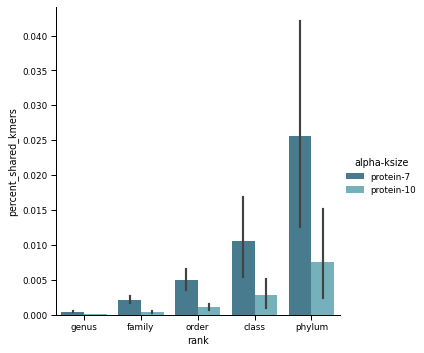

In [48]:
g=sns.catplot(data=no_superk[no_superk["alphabet"] == "protein"], x="rank", y="num_shared_kmers", hue="alpha-ksize", palette="GnBu_d",  order=no_superk_rankorder,sharey= False,kind="bar") #palette="GnBu_d"
g=sns.catplot(data=no_superk[no_superk["alphabet"] == "protein"], x="rank", y="percent_shared_kmers", hue="alpha-ksize", palette="GnBu_d", order=no_superk_rankorder,sharey= False,kind="bar") #palette="GnBu_d"



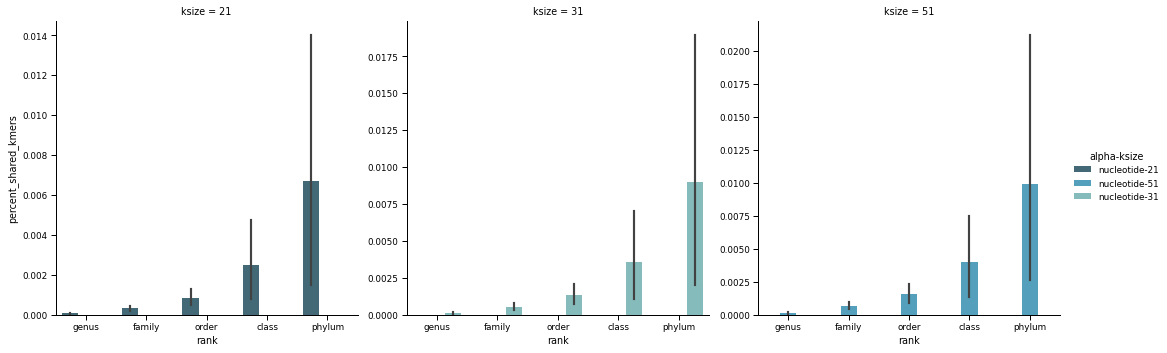

In [49]:
g=sns.catplot(data=no_superk[no_superk["alphabet"] == "nucleotide"], x="rank", y="percent_shared_kmers", hue="alpha-ksize", palette="GnBu_d",  col="ksize", order=no_superk_rankorder,sharey= False,kind="bar") #palette="GnBu_d"


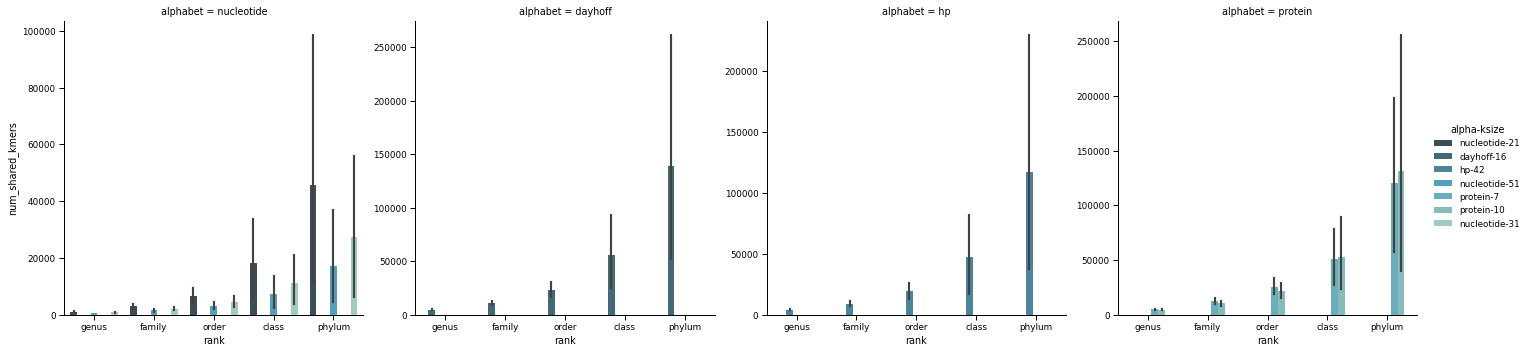

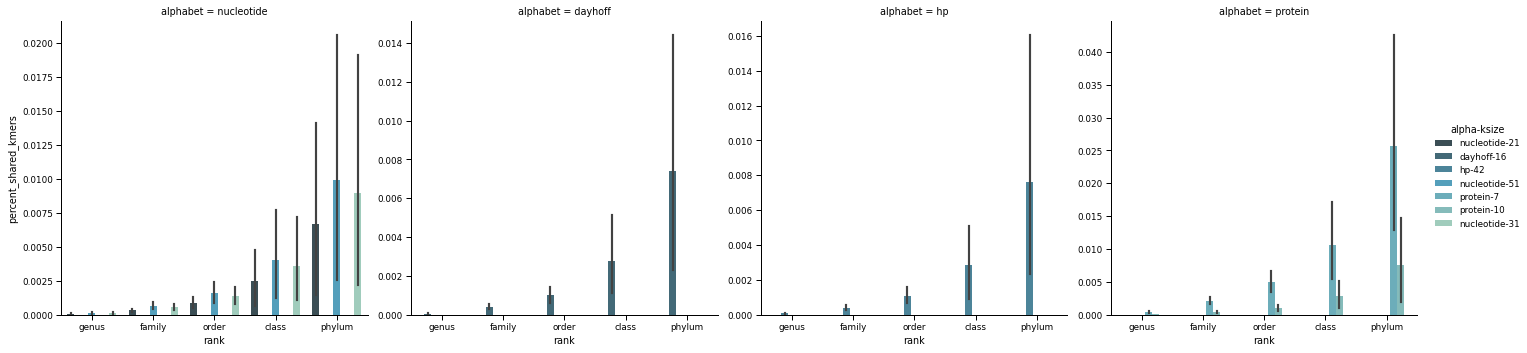

In [50]:
g=sns.catplot(data=no_superk, x="rank", y="num_shared_kmers", hue="alpha-ksize", palette="GnBu_d", col="alphabet",order=no_superk_rankorder,sharey= False,kind="bar") #palette="GnBu_d"
g=sns.catplot(data=no_superk, x="rank", y="percent_shared_kmers", hue="alpha-ksize", palette="GnBu_d", col="alphabet",order=no_superk_rankorder,sharey= False,kind="bar") #palette="GnBu_d"


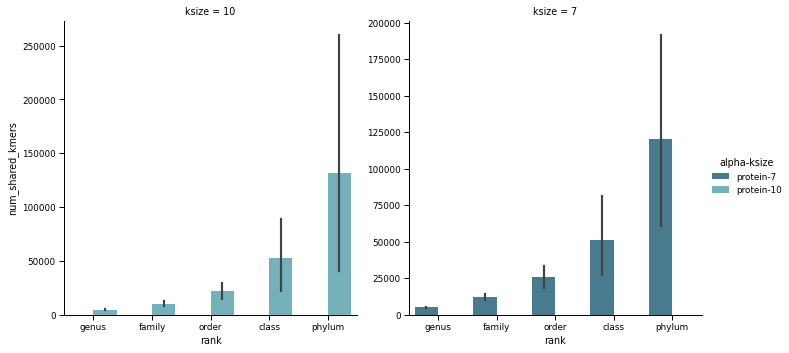

In [51]:
g=sns.catplot(data=no_superk[no_superk["alphabet"] == "protein"], x="rank", y="num_shared_kmers", hue="alpha-ksize", palette="GnBu_d",  col="ksize", order=no_superk_rankorder,sharey= False,kind="bar") #palette="GnBu_d"


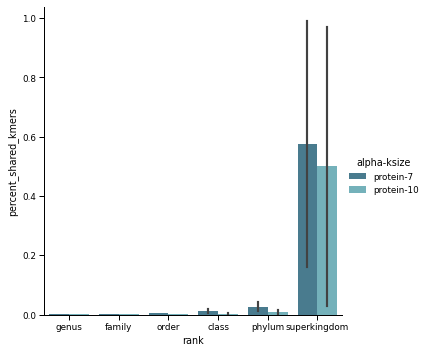

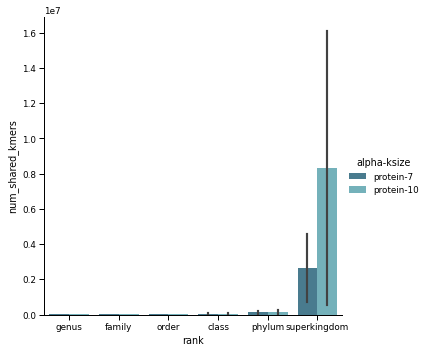

In [52]:
g=sns.catplot(data=sharedDF[sharedDF["alphabet"] == "protein"], x="rank", y="percent_shared_kmers", hue="alpha-ksize", palette="GnBu_d", order=rankorder,sharey= False,kind="bar") #palette="GnBu_d"
g=sns.catplot(data=sharedDF[sharedDF["alphabet"] == "protein"], x="rank", y="num_shared_kmers", hue="alpha-ksize", palette="GnBu_d", order=rankorder,sharey= False,kind="bar") #palette="GnBu_d"

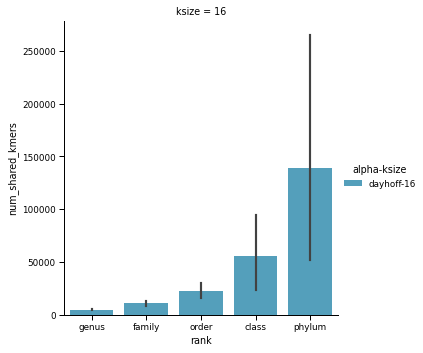

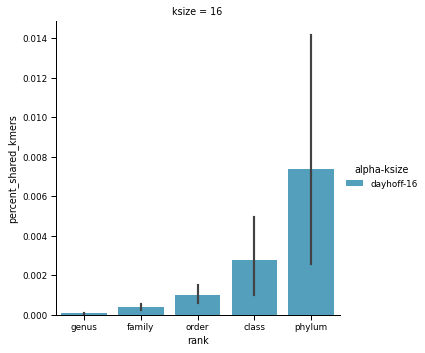

In [53]:
g=sns.catplot(data=no_superk[no_superk["alphabet"] == "dayhoff"], x="rank", y="num_shared_kmers", hue="alpha-ksize", palette="GnBu_d",  col="ksize", order=no_superk_rankorder,sharey= False,kind="bar") #palette="GnBu_d"
g=sns.catplot(data=no_superk[no_superk["alphabet"] == "dayhoff"], x="rank", y="percent_shared_kmers", hue="alpha-ksize", palette="GnBu_d",  col="ksize", order=no_superk_rankorder,sharey= False,kind="bar") #palette="GnBu_d"


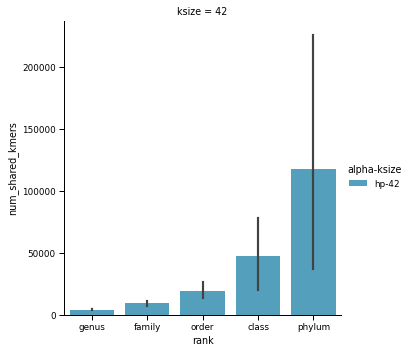

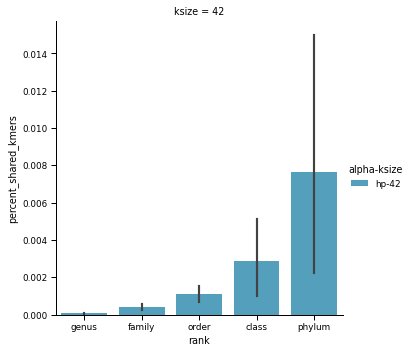

In [54]:
g=sns.catplot(data=no_superk[no_superk["alphabet"] == "hp"], x="rank", y="num_shared_kmers", hue="alpha-ksize", palette="GnBu_d",  col="ksize", order=no_superk_rankorder,sharey= False,kind="bar") #palette="GnBu_d"
g=sns.catplot(data=no_superk[no_superk["alphabet"] == "hp"], x="rank", y="percent_shared_kmers", hue="alpha-ksize", palette="GnBu_d",  col="ksize", order=no_superk_rankorder,sharey= False,kind="bar") #palette="GnBu_d"
